In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("/content/drive/My Drive/Police_Department_Incidents_-_Previous_Year__2016_.csv",dtype={'IncidntNum':'str','PdId':'str'})

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.41059E+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.60014E+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.60003E+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",1.61061E+13
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,8:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",1.76001E+13
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",1.76001E+13
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",1.76001E+13


In [0]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.41059E+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.60014E+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.60003E+13


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150499 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150499 non-null  object 
 1   Category    150499 non-null  object 
 2   Descript    150499 non-null  object 
 3   DayOfWeek   150499 non-null  object 
 4   Date        150499 non-null  object 
 5   Time        150499 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150499 non-null  object 
 8   Address     150499 non-null  object 
 9   X           150499 non-null  float64
 10  Y           150499 non-null  float64
 11  Location    150499 non-null  object 
 12  PdId        150499 non-null  object 
dtypes: float64(2), object(11)
memory usage: 16.1+ MB


In [0]:
df.shape

(150500, 13)

In [0]:
print(df.isnull().sum()) #เช็คข้อมูลว่ามีค่าnullหรือไม่

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64


In [0]:
df[df['PdDistrict'].isna()]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId


In [0]:
df.nunique()

IncidntNum    116698
Category          39
Descript         726
DayOfWeek          7
Date             366
Time            1439
PdDistrict        10
Resolution        14
Address        16129
X              18970
Y              19127
Location       19385
PdId            1909
dtype: int64

# **Data Exploration**

In [0]:
def cat_plot(df,col,color='salmon'):
  df_plt = df[col].value_counts().reset_index()
  df_plt.columns = [col,'count']
  plt.figure(figsize=(20,10))
  ax = sns.barplot(x=col,y='count',data=df_plt, color=color)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()

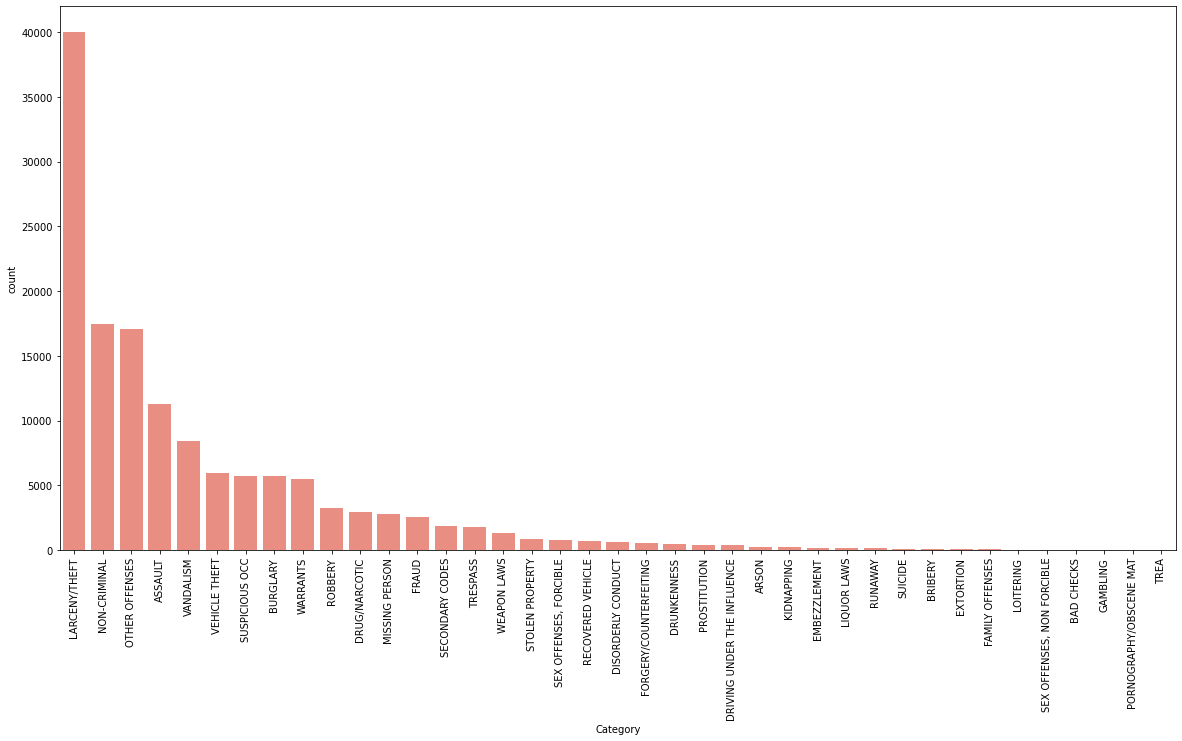

In [0]:
cat_plot(df_dropdup,'Category') #ร้านข้างล่างก่อน

## **Data Preparation**

### missing data

In [0]:
df = df.loc[~df['PdDistrict'].isna()] #เอาค่าnanออก

In [0]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.41059E+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.60014E+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.60003E+13


In [0]:
omit = ['Descript'] #ไม่เอาคอลัม
df_dropdup = df[[col for col in df.columns if col not in omit]].drop_duplicates() #เอาทุกคอลัมยกเว้นคอลัมที่อยู่ในomit และเอาค่าที่ไม่ซ้ำ